In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress
from scipy.optimize import curve_fit

from statsmodels.graphics.tsaplots import plot_acf,  plot_pacf

</br></br></br>

# NASDAQ-100

In [2]:
ndx_df = pd.read_csv("NDX.csv")

display(ndx_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000
1,1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000
2,1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000
3,1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000
4,1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000
5,1985-10-08,108.199997,108.269997,106.750000,107.160004,107.160004,144100000
6,1985-10-09,107.160004,108.989998,107.114998,108.629997,108.629997,156200000
7,1985-10-10,108.629997,109.510002,107.809998,109.434998,109.434998,154840000
8,1985-10-11,109.434998,111.120003,109.425003,111.050003,111.050003,158220000
9,1985-10-14,111.050003,113.269997,111.050003,113.184998,113.184998,123120000


In [3]:
# Conver Date to DateTime Object:
datetime_series = pd.to_datetime(ndx_df["Date"], format="%Y-%m-%d")
ndx_df["Day"] = (datetime_series - datetime_series.iloc[-1]).dt.days
del datetime_series
display(ndx_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000,-13743
1,1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000,-13742
2,1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000,-13741
3,1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000,-13740
4,1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000,-13737
5,1985-10-08,108.199997,108.269997,106.750000,107.160004,107.160004,144100000,-13736
6,1985-10-09,107.160004,108.989998,107.114998,108.629997,108.629997,156200000,-13735
7,1985-10-10,108.629997,109.510002,107.809998,109.434998,109.434998,154840000,-13734
8,1985-10-11,109.434998,111.120003,109.425003,111.050003,111.050003,158220000,-13733
9,1985-10-14,111.050003,113.269997,111.050003,113.184998,113.184998,123120000,-13730


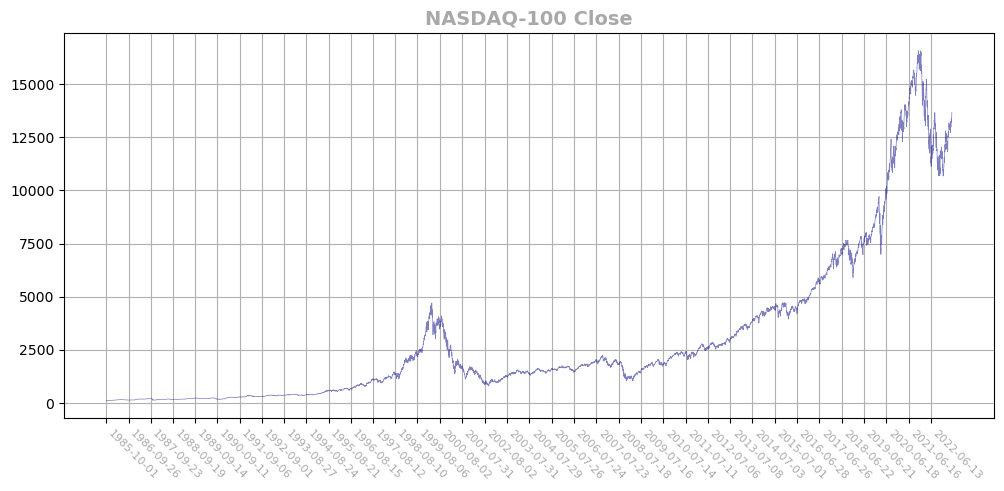

In [4]:
fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()

day = ndx_df["Day"].to_numpy()
close = ndx_df["Close"].to_numpy()
dates = ndx_df["Date"].to_numpy()

ax.set_title("NASDAQ-100 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, close, lw=0.5, color="navy", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

	Slope:      0.0004231
	Intercept:  9.5668145
	Exp Slope:  1.0004232
Ratio of Expected to Current:  1.0444596
Max Deviation:                 1.4613292


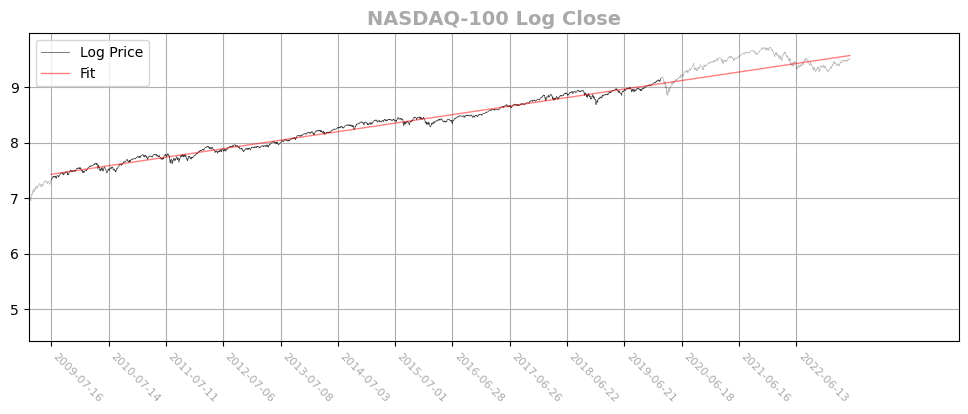

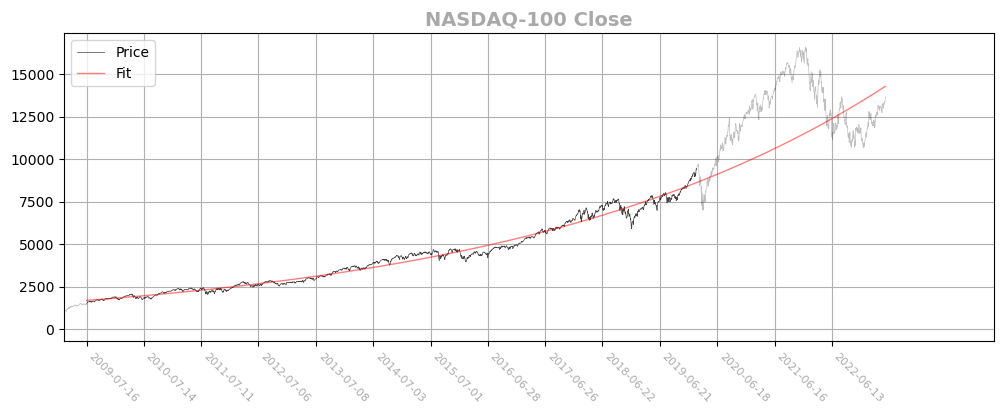

(3484,) (3484,)


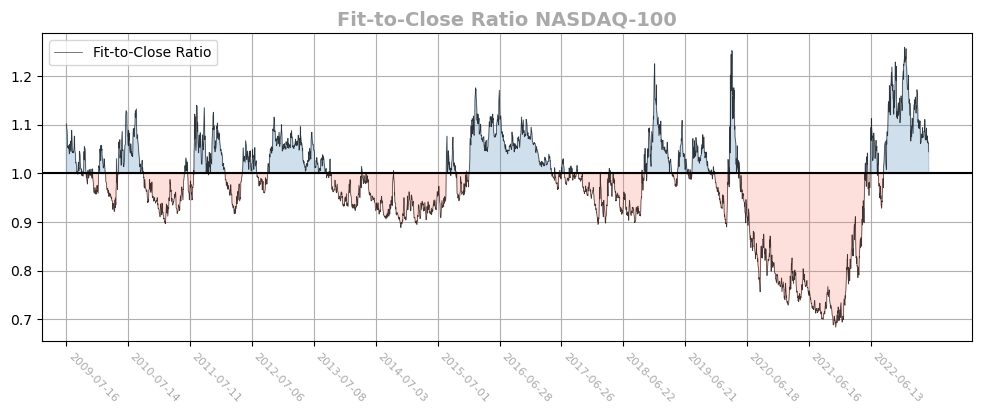

In [5]:
day = ndx_df["Day"].to_numpy()
close = ndx_df["Close"].to_numpy()
log_close = np.log(close)
dates = ndx_df["Date"].to_numpy()

strt_day_idx = 6000
end_day_idx = -825
target_day_idx = -1
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]
print("\tSlope:     ", np.around(fit_results[0], 7))
print("\tIntercept: ", np.around(fit_results[1], 7))
print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx] - fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))


## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("NASDAQ-100 Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("NASDAQ-100 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Relative Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio NASDAQ-100", fontsize=14, fontweight="bold", color="darkgrey")
print(fit_points.shape, close[strt_day_idx + 1:].shape)
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="steelblue", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

Log Return Mean & STD :
 - Mean:  0.0006855 ± 0.000211
 - STD:   0.0108816


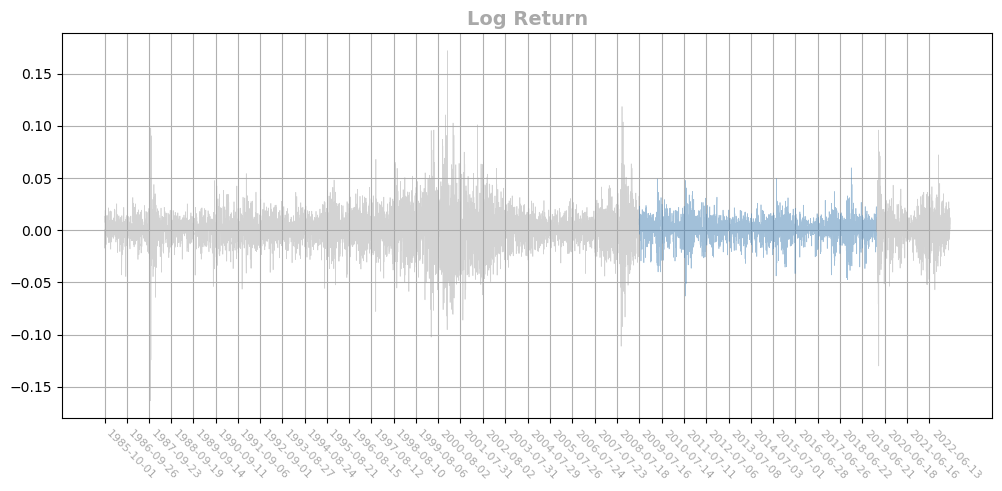

In [6]:
close = ndx_df["Close"].to_numpy()
day = ndx_df["Day"].to_numpy()[:-1]
dates = ndx_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Mean: ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - STD:  ", np.around(log_returns_in_range.std(), 7))

fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

In [7]:
# # Analyze DotCom Bubble:
# fig = plt.figure(figsize=(12., 5.0))
# ax = fig.gca()

# day = ndx_df["Day"].to_numpy()
# log_close = np.log(ndx_df["Close"].to_numpy())
# dates = ndx_df["Date"].to_numpy()

# strt_day_idx = 0
# end_day_idx = 2400
# target_day_idx = 5600 #3600
# fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
# fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]
# print("\tSlope:     ", np.around(fit_results[0], 7))
# print("\tIntercept: ", np.around(fit_results[1], 7))
# print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
# max_log_delta = np.max(log_close[strt_day_idx:target_day_idx]-fit_points)
# print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
# print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

# ax.set_title("NASDAQ-100 Log Close\n DOT COM Bubble", fontsize=14, fontweight="bold", color="darkgrey")
# ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
#         lw=0.5, color="black", alpha=0.75, label="Log Price")
# ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
# ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
# ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
# ax.legend(loc="upper left")
# ax.set_xticks(day[::250])
# ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
# ax.grid()
# ax.set_axisbelow(True)

# plt.show()

	Slope:      0.0003433
	Intercept:  9.5905056
	Exp Slope:  1.0003434
Ratio of Expected to Current:  1.0048546
Max Deviation:                 5.8567826


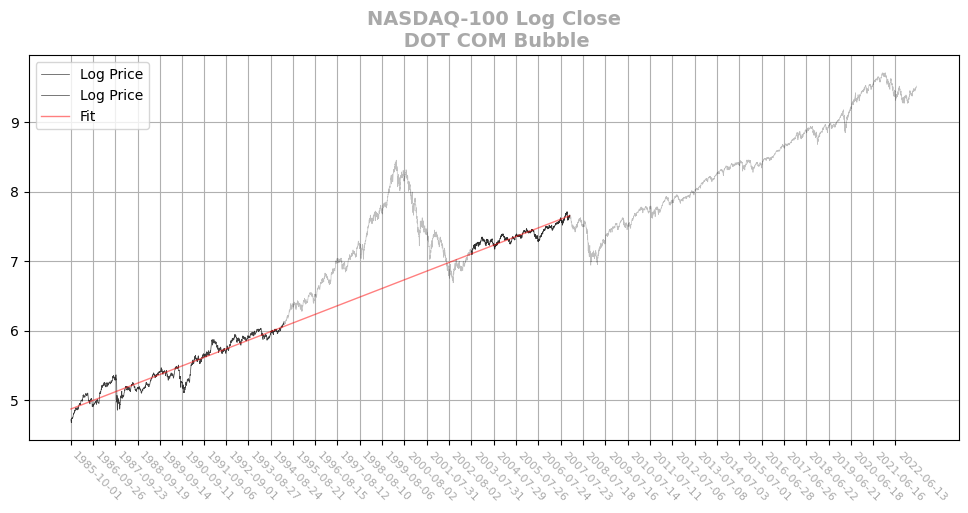

In [8]:
# Analyze DotCom Bubble:
fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()

day = ndx_df["Day"].to_numpy()
log_close = np.log(ndx_df["Close"].to_numpy())
dates = ndx_df["Date"].to_numpy()

strt_day_idx = 0
end_day_idx = 2400
strt_day_idx_2 = 4500
end_day_idx_2 = 5600
target_day_idx = 5600 #3600
fit_results = linregress(
    np.concatenate((day[strt_day_idx:end_day_idx], day[strt_day_idx_2:end_day_idx_2]), axis=0), 
    np.concatenate((log_close[strt_day_idx:end_day_idx], log_close[strt_day_idx_2:end_day_idx_2]), axis=0))
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]
print("\tSlope:     ", np.around(fit_results[0], 7))
print("\tIntercept: ", np.around(fit_results[1], 7))
print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx]-fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

ax.set_title("NASDAQ-100 Log Close\n DOT COM Bubble", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:end_day_idx], 
        log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[end_day_idx:end_day_idx_2], log_close[end_day_idx:end_day_idx_2], 
        lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx_2:end_day_idx_2], 
        log_close[strt_day_idx_2:end_day_idx_2], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[end_day_idx_2:], log_close[end_day_idx_2:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

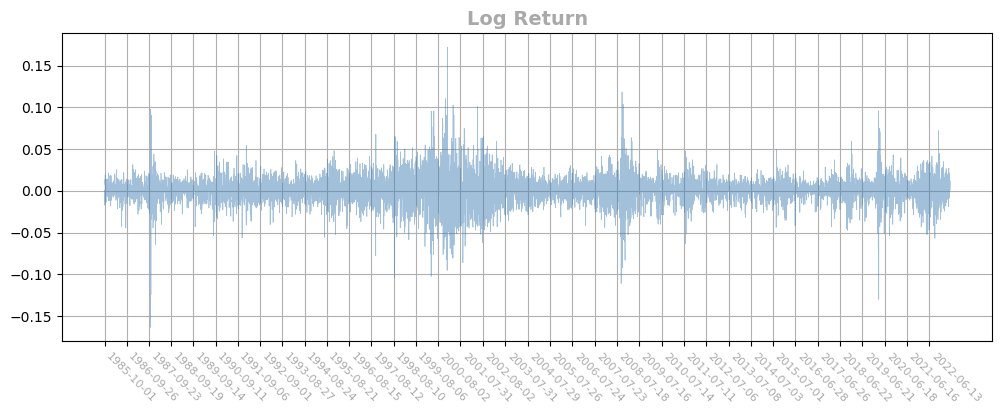

In [9]:
close = ndx_df["Close"].to_numpy()
day = ndx_df["Day"].to_numpy()[:-1]
dates = ndx_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])

fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, log_return, lw=0.5, color="steelblue", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

### Log Return vs. Volume:

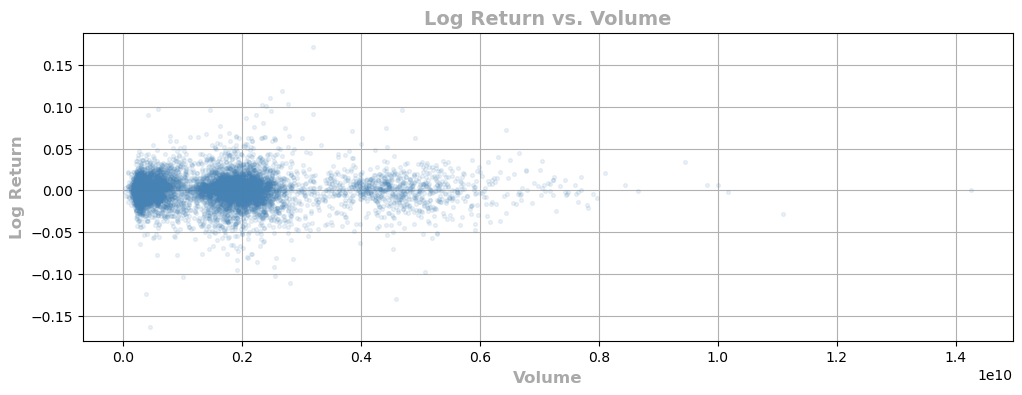

In [10]:
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()

close = ndx_df["Close"].to_numpy()
day = ndx_df["Day"].to_numpy()[:-1]
dates = ndx_df["Date"].to_numpy()[:-1]
log_return = np.log(close[1:] / close[:-1])
vol = ndx_df["Volume"].to_numpy()[1:]

ax.set_title("Log Return vs. Volume", fontsize=14, fontweight="bold", color="darkgrey")
ax.scatter(vol, log_return, s=7.5, marker="o", color="steelblue", alpha=0.10)
ax.set_xlabel("Volume", fontsize=12, fontweight="bold", color="darkgrey")
ax.set_ylabel("Log Return", fontsize=12, fontweight="bold", color="darkgrey")
# ax.set_xticks(day[::250])
# ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

### Plot ACF and PACF for Log Returns:

/Users/sedigh/miniforge3/envs/nlp/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


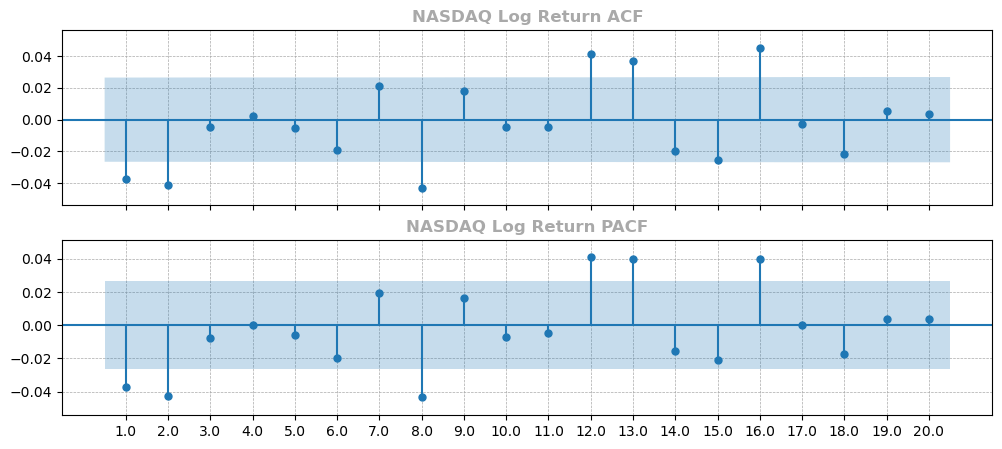

In [11]:
common_title = "NASDAQ Log Return"

lags = np.arange(20) + 1.0
ci_alpha = 0.01
auto_ylim = True

fig = plt.figure(figsize=(12., 5.0))
#
plt.subplot(2, 1, 1)
plot_acf(x=log_return, ax=plt.gca(), lags=lags, alpha=ci_alpha, 
         fft=True, auto_ylims=auto_ylim)
plt.xticks(lags, [])
plt.title(common_title + " ACF", fontsize=12., fontweight="bold", color="darkgrey")
plt.grid(lw=0.5, ls="--", color="darkgrey")
plt.gca().set_axisbelow(True)
#
plt.subplot(2, 1, 2)
plot_pacf(x=log_return, ax=plt.gca(), lags=lags, alpha=ci_alpha, 
          auto_ylims=auto_ylim)
plt.xticks(lags, lags)
plt.title(common_title + " PACF", fontsize=12., fontweight="bold", color="darkgrey")
plt.grid(lw=0.5, ls="--", color="darkgrey")
plt.gca().set_axisbelow(True)
#
plt.show()

</br></br></br>

# Dow Jones

In [12]:
dji_df = pd.read_csv("DJI.csv")

# Convert columns from str to float:
for col in ["Open", "High", "Low", "Close", "Adj Close", "Volume"]:
    dji_df[col] = dji_df[col].apply(lambda x: float(x.replace(",", "")))

display(dji_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume
0,"May 18, 2023",33374.56,33374.60,33287.10,33345.72,33345.72,54228989.0
1,"May 17, 2023",33092.48,33472.38,33050.41,33420.77,33420.77,307130000.0
2,"May 16, 2023",33275.37,33290.85,33006.19,33012.14,33012.14,246680000.0
3,"May 15, 2023",33321.21,33400.30,33161.93,33348.60,33348.60,224020000.0
4,"May 12, 2023",33370.58,33406.40,33110.61,33300.62,33300.62,227570000.0
5,"May 11, 2023",33383.89,33389.88,33127.70,33309.51,33309.51,298000000.0
6,"May 10, 2023",33707.20,33772.09,33239.45,33531.33,33531.33,271180000.0
7,"May 09, 2023",33589.85,33656.40,33509.72,33561.81,33561.81,232940000.0
8,"May 08, 2023",33715.15,33747.49,33509.23,33618.69,33618.69,225680000.0
9,"May 05, 2023",33248.55,33748.43,33248.55,33674.38,33674.38,316350000.0


In [13]:
# Conver Date to DateTime Object:
datetime_series = pd.to_datetime(dji_df["Date"], format="%b %d, %Y")
dji_df["Day"] = (datetime_series - datetime_series.iloc[0]).dt.days
del datetime_series
display(dji_df.head(10))

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,"May 18, 2023",33374.56,33374.60,33287.10,33345.72,33345.72,54228989.0,0
1,"May 17, 2023",33092.48,33472.38,33050.41,33420.77,33420.77,307130000.0,-1
2,"May 16, 2023",33275.37,33290.85,33006.19,33012.14,33012.14,246680000.0,-2
3,"May 15, 2023",33321.21,33400.30,33161.93,33348.60,33348.60,224020000.0,-3
4,"May 12, 2023",33370.58,33406.40,33110.61,33300.62,33300.62,227570000.0,-6
5,"May 11, 2023",33383.89,33389.88,33127.70,33309.51,33309.51,298000000.0,-7
6,"May 10, 2023",33707.20,33772.09,33239.45,33531.33,33531.33,271180000.0,-8
7,"May 09, 2023",33589.85,33656.40,33509.72,33561.81,33561.81,232940000.0,-9
8,"May 08, 2023",33715.15,33747.49,33509.23,33618.69,33618.69,225680000.0,-10
9,"May 05, 2023",33248.55,33748.43,33248.55,33674.38,33674.38,316350000.0,-13


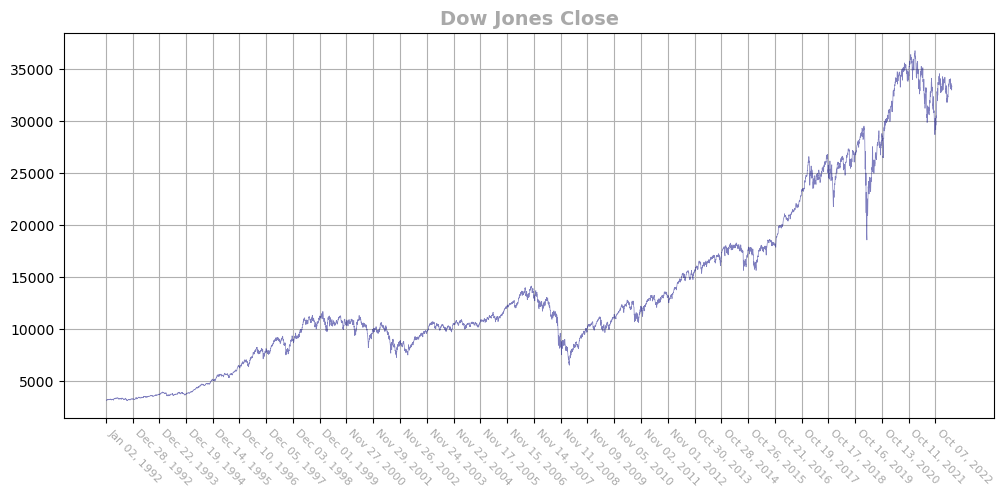

In [14]:
fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()


day = dji_df["Day"].to_numpy()[::-1]
close = dji_df["Close"].to_numpy()[::-1]
dates = dji_df["Date"].to_numpy()[::-1]

ax.set_title("Dow Jones Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, close, lw=0.5, color="navy", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

	Slope:      0.0002731
	Intercept:  10.5696589
	Exp Slope:  1.0002732
Ratio of Expected to Current:  1.167309
Max Deviation:                 1.160596


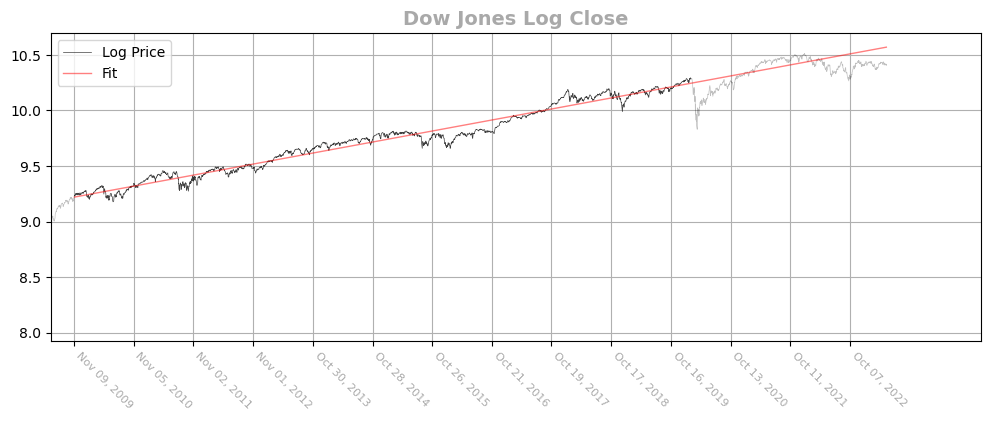

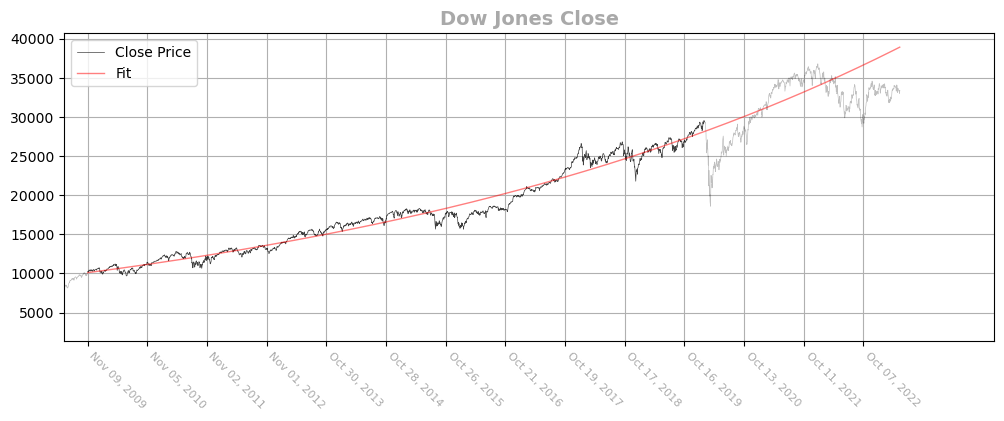

(3408,) (3408,)


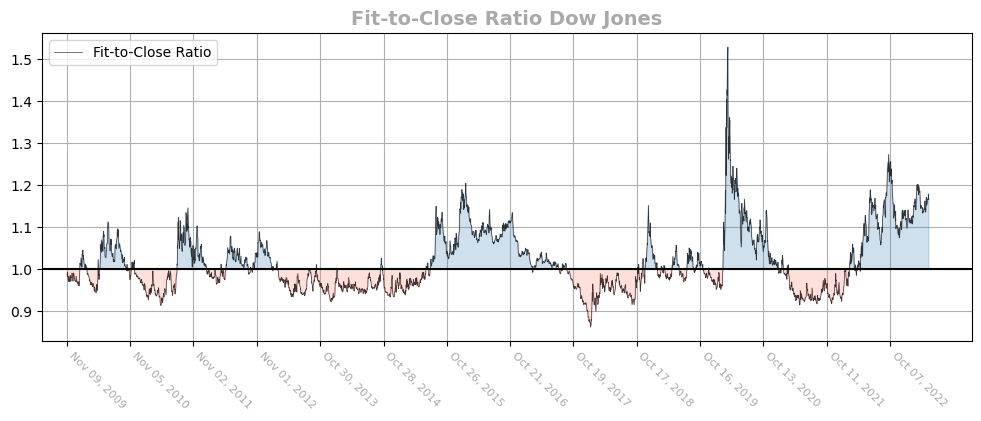

In [15]:
day = dji_df["Day"].to_numpy()[::-1]
close = dji_df["Close"].to_numpy()[::-1]
log_close = np.log(close)
dates = dji_df["Date"].to_numpy()[::-1]

strt_day_idx = 4500
end_day_idx = -825
target_day_idx = -1
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]
print("\tSlope:     ", np.around(fit_results[0], 7))
print("\tIntercept: ", np.around(fit_results[1], 7))
print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx]-fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))

## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Dow Jones Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Dow Jones Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Close Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio Dow Jones", fontsize=14, fontweight="bold", color="darkgrey")
print(fit_points.shape, close[strt_day_idx + 1:].shape)
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="steelblue", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

Log Return Mean & STD :
 - Mean:  0.0004088 ± 0.0001739
 - STD:   0.0088359


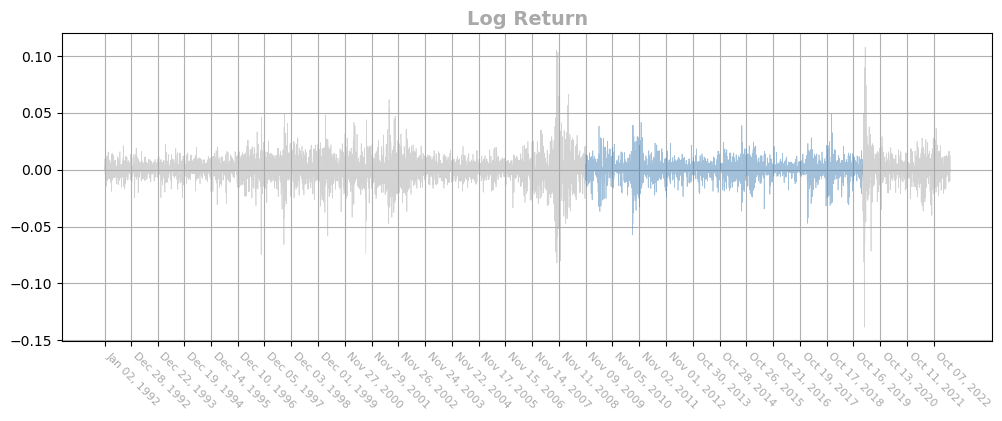

In [16]:
close = dji_df["Close"].to_numpy()[::-1]
day = dji_df["Day"].to_numpy()[::-1][:-1]
dates = dji_df["Date"].to_numpy()[::-1][:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Mean: ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - STD:  ", np.around(log_returns_in_range.std(), 7))


fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()

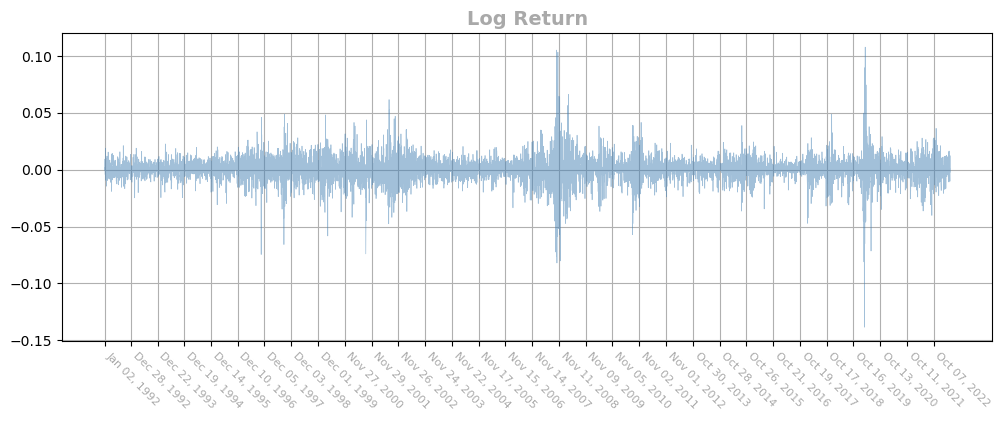

In [17]:
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()

close = dji_df["Close"].to_numpy()[::-1]
day = dji_df["Day"].to_numpy()[::-1][:-1]
dates = dji_df["Date"].to_numpy()[::-1][:-1]
log_return = np.log(close[1:] / close[:-1])

ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, log_return, lw=0.5, color="steelblue", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

### Plot ACF and PACF for Log Returns:

/Users/sedigh/miniforge3/envs/nlp/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


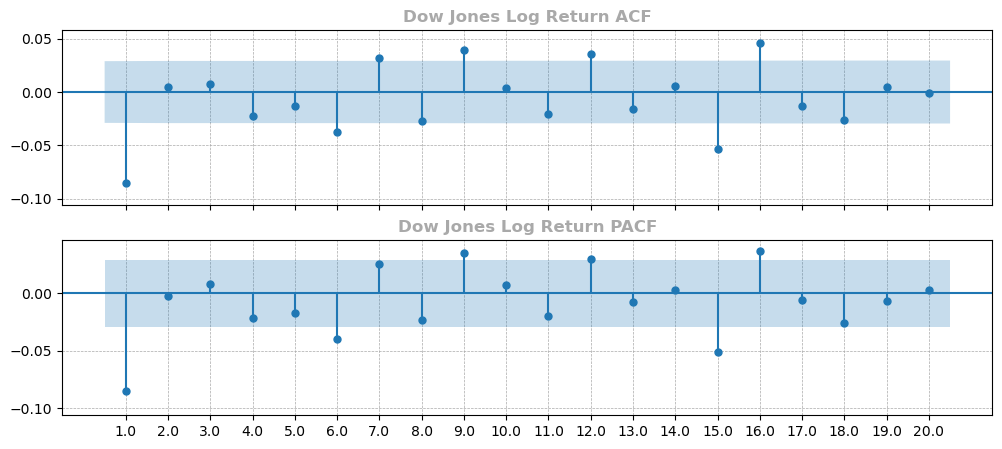

In [18]:
common_title = "Dow Jones Log Return"

lags = np.arange(20) + 1.0
ci_alpha = 0.01
auto_ylim = True

fig = plt.figure(figsize=(12., 5.0))
#
plt.subplot(2, 1, 1)
plot_acf(x=log_return, ax=plt.gca(), lags=lags, alpha=ci_alpha, 
         fft=True, auto_ylims=auto_ylim)
plt.xticks(lags, [])
plt.title(common_title + " ACF", fontsize=12., fontweight="bold", color="darkgrey")
plt.grid(lw=0.5, ls="--", color="darkgrey")
plt.gca().set_axisbelow(True)
#
plt.subplot(2, 1, 2)
plot_pacf(x=log_return, ax=plt.gca(), lags=lags, alpha=ci_alpha, 
          auto_ylims=auto_ylim)
plt.xticks(lags, lags)
plt.title(common_title + " PACF", fontsize=12., fontweight="bold", color="darkgrey")
plt.grid(lw=0.5, ls="--", color="darkgrey")
plt.gca().set_axisbelow(True)
#
plt.show()

</br></br></br>

# S&P 500

In [19]:
sp500_df = pd.read_csv("WSJ_SP500.csv")

display(sp500_df.head(10))

,Date,Open,High,Low,Close
0,05/17/23,4122.85,4164.67,4113.62,4158.77
1,05/16/23,4127.95,4135.54,4109.86,4109.90
2,05/15/23,4126.65,4141.25,4110.27,4136.28
3,05/12/23,4138.54,4143.74,4099.12,4124.08
4,05/11/23,4132.24,4132.80,4109.29,4130.62
5,05/10/23,4143.74,4154.28,4098.92,4137.64
6,05/09/23,4124.25,4130.35,4116.65,4119.17
7,05/08/23,4136.98,4142.30,4123.81,4138.12
8,05/05/23,4084.73,4147.02,4084.73,4136.25
9,05/04/23,4082.55,4082.61,4048.28,4061.22


In [20]:
# Conver Date to DateTime Object:
datetime_series = pd.to_datetime(sp500_df["Date"], format="%m/%d/%y")
sp500_df["Day"] = (datetime_series - datetime_series.iloc[-1]).dt.days
del datetime_series
sp500_df.rename(columns={c: c.replace(" ","") for c in sp500_df.columns}, inplace = True)
display(sp500_df.head(10))

,Date,Open,High,Low,Close,Day
0,05/17/23,4122.85,4164.67,4113.62,4158.77,12188
1,05/16/23,4127.95,4135.54,4109.86,4109.90,12187
2,05/15/23,4126.65,4141.25,4110.27,4136.28,12186
3,05/12/23,4138.54,4143.74,4099.12,4124.08,12183
4,05/11/23,4132.24,4132.80,4109.29,4130.62,12182
5,05/10/23,4143.74,4154.28,4098.92,4137.64,12181
6,05/09/23,4124.25,4130.35,4116.65,4119.17,12180
7,05/08/23,4136.98,4142.30,4123.81,4138.12,12179
8,05/05/23,4084.73,4147.02,4084.73,4136.25,12176
9,05/04/23,4082.55,4082.61,4048.28,4061.22,12175


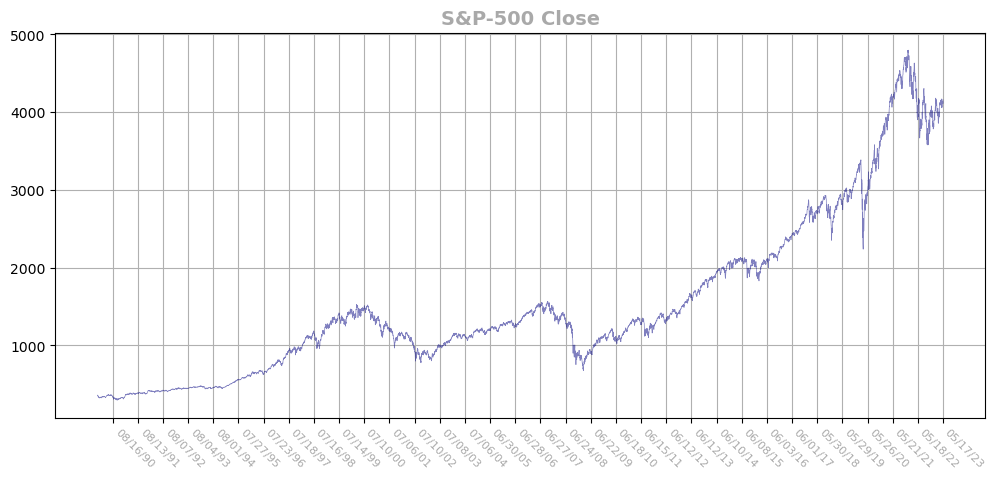

In [21]:
fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()

day = sp500_df["Day"].to_numpy()
close = sp500_df["Close"].to_numpy()
dates = sp500_df["Date"].to_numpy()

ax.set_title("S&P-500 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day, close, lw=0.5, color="navy", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)

plt.show()

	Slope:      0.0002886
	Intercept:  4.9019695
	Exp Slope:  1.0002886
Ratio of Expected to Current:  1.0896115
Max Deviation:                 1.2231959


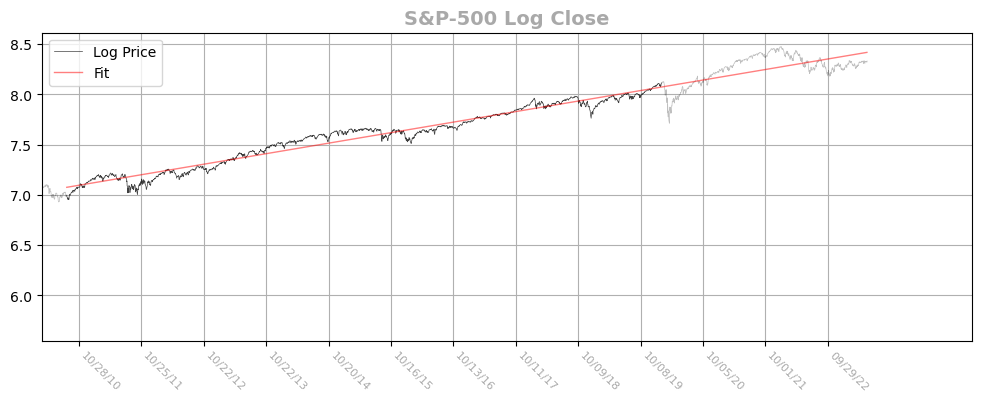

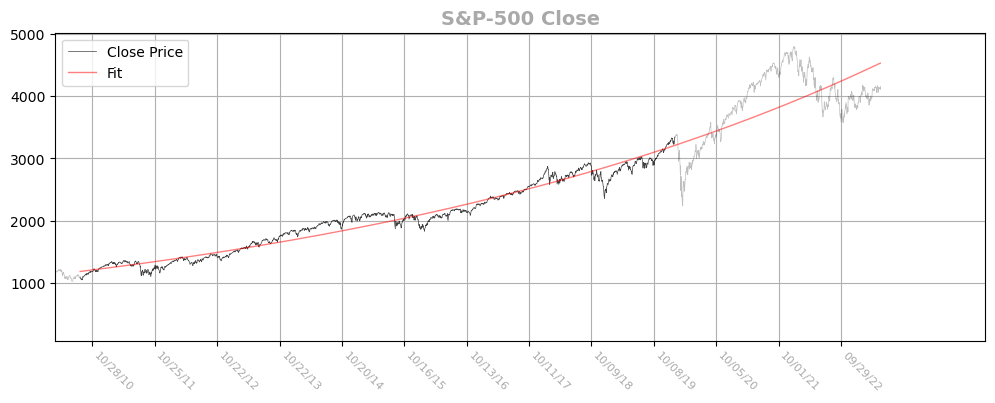

(3208,) (3208,)


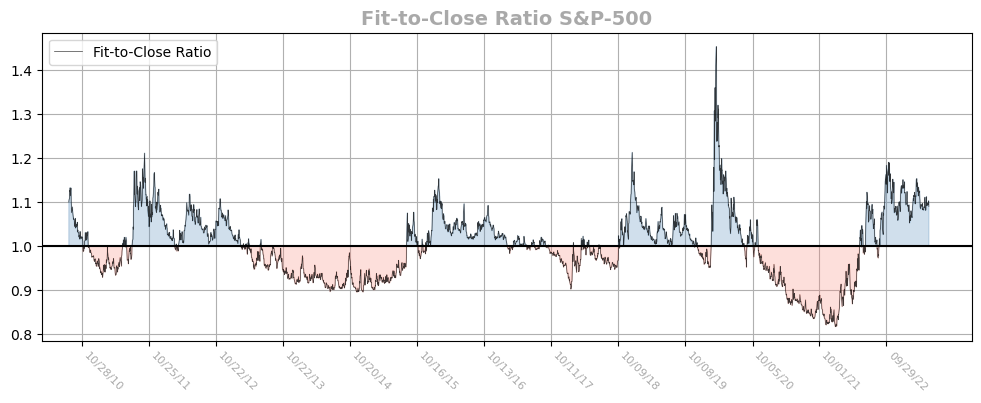

In [22]:
day = sp500_df["Day"].to_numpy()[::-1]
close = sp500_df["Close"].to_numpy()[::-1]
log_close = np.log(close)
dates = sp500_df["Date"].to_numpy()[::-1]

strt_day_idx = 5200
end_day_idx = -825
target_day_idx = -1
fit_results = linregress(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx])
fit_points = fit_results[0] * day[strt_day_idx:target_day_idx] + fit_results[1]
print("\tSlope:     ", np.around(fit_results[0], 7))
print("\tIntercept: ", np.around(fit_results[1], 7))
print("\tExp Slope: ", np.around(np.exp(fit_results[0]), 7))
max_log_delta = np.max(log_close[strt_day_idx:target_day_idx] - fit_points)
print("Ratio of Expected to Current: ", np.around(np.exp(fit_points[-1] - log_close[target_day_idx]), 7))
print("Max Deviation:                ", np.around(np.exp(max_log_delta), 7))


## Log Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("S&P-500 Log Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], log_close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Log Price")
ax.plot(day[:strt_day_idx], log_close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], log_close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], fit_points, lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("S&P-500 Close", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[strt_day_idx:end_day_idx], close[strt_day_idx:end_day_idx], 
        lw=0.5, color="black", alpha=0.75, label="Close Price")
ax.plot(day[:strt_day_idx], close[:strt_day_idx], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[end_day_idx:], close[end_day_idx:], lw=0.5, color="black", alpha=0.25, label=None)
ax.plot(day[strt_day_idx:target_day_idx], np.exp(fit_points), lw=1.0, color="red", alpha=0.5, label="Fit")
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()


## Close Plot
fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Fit-to-Close Ratio S&P-500", fontsize=14, fontweight="bold", color="darkgrey")
print(fit_points.shape, close[strt_day_idx + 1:].shape)
x = day[strt_day_idx + 1:]
y = np.exp(fit_points) / close[strt_day_idx + 1:]
ax.plot(x, y, lw=0.5, color="black", alpha=0.75, label="Fit-to-Close Ratio")
ax.fill_between(x, 1.0, y, where=(y > 1.0), color="steelblue", alpha=0.25)
ax.fill_between(x, 1.0, y, where=(y < 1.0), color="salmon", alpha=0.25)
ax.axhline(y = 1.0, color="black", linestyle="-", lw=1.5)
ax.legend(loc="upper left")
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(day[strt_day_idx-100],)
#
plt.show()

Log Return Mean & STD :
 - Mean:  0.000469 ± 0.000185
 - STD:   0.009032


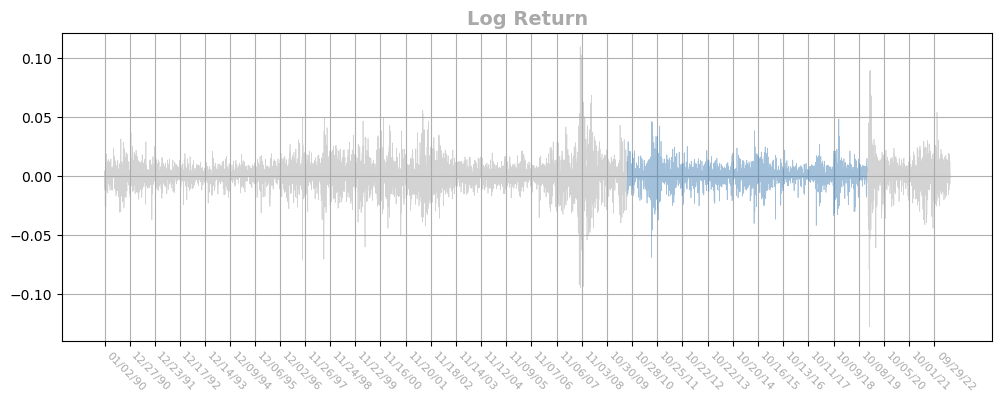

In [23]:
close = sp500_df["Close"].to_numpy()[::-1]
day = sp500_df["Day"].to_numpy()[::-1][:-1]
dates = sp500_df["Date"].to_numpy()[::-1][:-1]
log_return = np.log(close[1:] / close[:-1])

print("Log Return Mean & STD :")
log_returns_in_range = log_return[strt_day_idx:end_day_idx]
est_err = log_returns_in_range.std() / np.sqrt(log_returns_in_range.size)
print(" - Mean: ", np.around(log_returns_in_range.mean(), 7), "±", np.around(est_err, 7))
print(" - STD:  ", np.around(log_returns_in_range.std(), 7))


fig = plt.figure(figsize=(12., 4.0))
ax = fig.gca()
#
ax.set_title("Log Return", fontsize=14, fontweight="bold", color="darkgrey")
ax.plot(day[:strt_day_idx], log_return[:strt_day_idx], lw=0.5, color="darkgrey", alpha=0.5)
ax.plot(day[strt_day_idx:end_day_idx], log_return[strt_day_idx:end_day_idx], 
        lw=0.5, color="steelblue", alpha=0.5)
ax.plot(day[end_day_idx:], log_return[end_day_idx:], lw=0.5, color="darkgrey", alpha=0.5)
ax.set_xticks(day[::250])
ax.set_xticklabels(dates[::250], fontsize=8, color="darkgrey", rotation=-45, ha="left", va="top")
ax.grid()
ax.set_axisbelow(True)
#
plt.show()